## Analyzing Popular App Categories on Google Play
In this project, our objective is to determine which app categories are popular on the Google Play Store. We will analyze various factors such as download counts, ratings, and reviews to identify trends and preferences among users. By focusing on free apps, which are more accessible to a wider audience, we can gain valuable insights into the types of apps that are in demand and potentially guide developers in creating successful apps.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
android_df = pd.read_csv("googleplaystore.csv")

In [3]:
# exploring dataset
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Cleaning the dataset

In [4]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [5]:
android_df[android_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [6]:
temp = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']
temp

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [7]:
android_df[android_df["Category"] == "1.9"] = temp

In [8]:
# checking if the dataset is updated
android_df[android_df["App"] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,LIFESTYLE,"February 11, 2018",1.0.19,4.0 and up


In [9]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [10]:
app_df = android_df["App"].value_counts()

##### Identify and correct duplicate rows based on the 'App' column.

In [11]:
app_df[app_df > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [12]:
dup_app_df = android_df[android_df.duplicated(subset = ["App"], keep = False)]
dup_app_df["App"].nunique()

798

In [13]:
dup_app_df[dup_app_df["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [14]:
reviews_max = android_df.groupby("App")["Reviews"].max()
reviews_max

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [15]:
# an empty list to store element data
android_clean = []

# an empty list to keep track already added apps
dup_app = []

# Iterate through each row of the DataFrame
for i,j in android_df.iterrows():
    name = j["App"]
    n_review = j["Reviews"]

    # Check if the current app has the maximum number of reviews and has not already been added   
    if reviews_max[name] == n_review and name not in dup_app:
        android_clean.append(j) # Adding the app index to the list android_clean
        dup_app.append(name)    # Adding the app to the list dup_app   

In [16]:
len(android_clean)

9660

In [17]:
android_df["App"].nunique()

9660

In [18]:
android_clean = pd.DataFrame(android_clean)

In [19]:
def is_english(word):
    lst = []

    for i in word:
        if ord(i)<127:
            lst.append(True)
        else:
            lst.append(False)

    temp = 0

    for j in lst:
        if j == False:
            temp += 1

    if temp <= 3:
        return True
    else:
        return False

In [20]:
android_english = android_clean[android_clean["App"].apply(is_english)]

##### Isolating the Free Apps
As mentioned in the introduction, we focus exclusively on developing free apps, with our primary revenue source being in-app advertisements. Therefore, we need to isolate only the free apps from our datasets

In [21]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
android_free = android_english[android_english["Price"] == "0"]

## Analysing

In [23]:
round(android_free["Category"].value_counts(normalize = True)*100,1)

Category
FAMILY                 18.9
GAME                    9.7
TOOLS                   8.5
BUSINESS                4.6
LIFESTYLE               3.9
PRODUCTIVITY            3.9
FINANCE                 3.7
MEDICAL                 3.5
SPORTS                  3.4
PERSONALIZATION         3.3
COMMUNICATION           3.2
HEALTH_AND_FITNESS      3.1
PHOTOGRAPHY             2.9
NEWS_AND_MAGAZINES      2.8
SOCIAL                  2.7
TRAVEL_AND_LOCAL        2.3
SHOPPING                2.2
BOOKS_AND_REFERENCE     2.1
DATING                  1.9
VIDEO_PLAYERS           1.8
MAPS_AND_NAVIGATION     1.4
FOOD_AND_DRINK          1.2
EDUCATION               1.2
ENTERTAINMENT           1.0
LIBRARIES_AND_DEMO      0.9
AUTO_AND_VEHICLES       0.9
HOUSE_AND_HOME          0.8
WEATHER                 0.8
EVENTS                  0.7
PARENTING               0.7
ART_AND_DESIGN          0.6
COMICS                  0.6
BEAUTY                  0.6
Name: proportion, dtype: float64

#### Analysing Top Android App Categories

In [24]:
categories = android_free["Category"].value_counts().index[:15]
counts = android_free["Category"].value_counts().values[:15]
percentage = round(android_free["Category"].value_counts(normalize = True)*100,1)[:15]

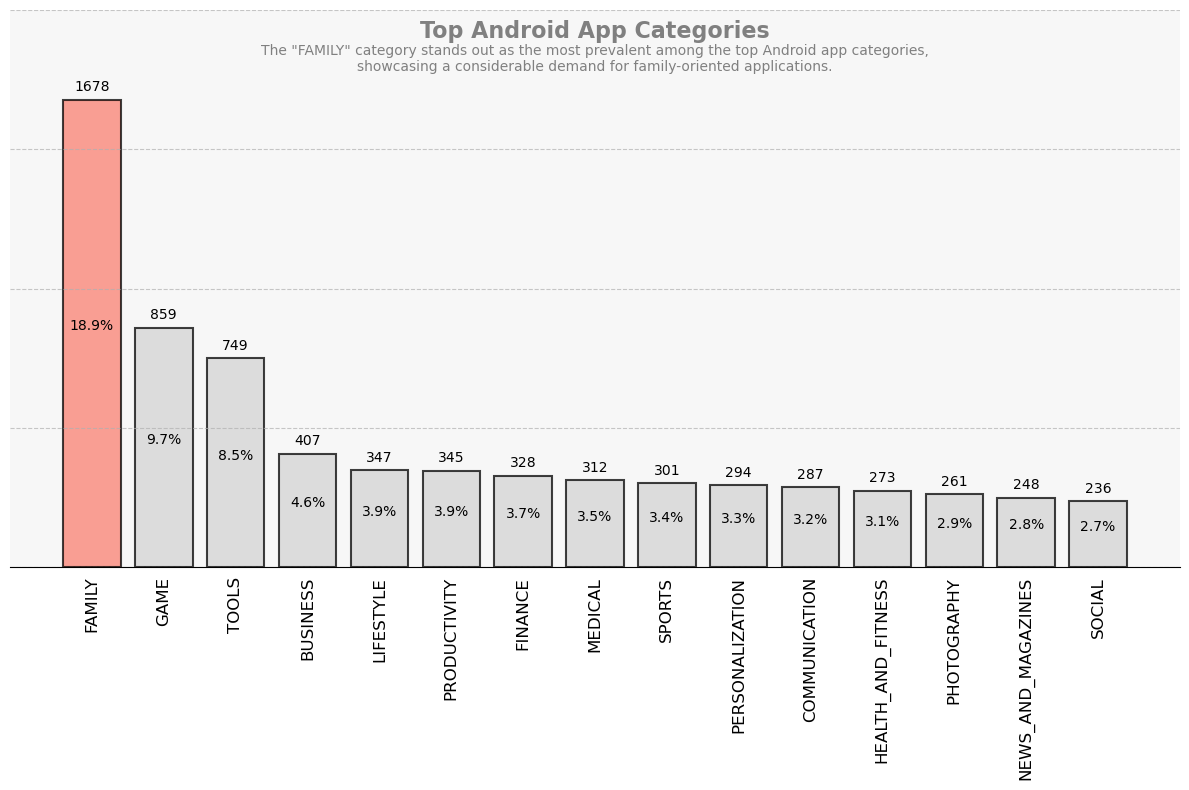

In [25]:
# styling the bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(categories, counts, color = "lightgray", alpha = 0.75, edgecolor = "black", linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.yticks(range(0, 2500, 500), [])
plt.tick_params(bottom = 0, left = 0)

# highlighting the bar with highest count
max_count_cat = categories[counts.argmax()]
max_count_index = list(categories).index(max_count_cat)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

# adding data labels and percentages inside each bar
for bar, perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20, height, ha="center", va="bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{perc}%", ha="center", va="bottom", fontsize=10)
    
# adding chart title and conclusion in the chart
title = 'Top Android App Categories'
conclusion = 'The "FAMILY" category stands out as the most prevalent among the top Android app categories,\n\
showcasing a considerable demand for family-oriented applications.'
plt.text(0.5, 0.95, title, horizontalalignment = "center", fontsize=16, transform=plt.gca().transAxes, 
         color = "grey", fontweight="bold")
plt.text(0.5, 0.89, conclusion, horizontalalignment = "center", fontsize=10, transform=plt.gca().transAxes, color = "grey")

# removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()
plt.gca().set_facecolor("#f7f7f7")

plt.show()

In [26]:
android_free[android_free['Category']=="FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


#### Utilizing Installation Numbers for Insights into Genre Popularity on the Google Play Market
In the Google Play market, we have data on the number of installations, which allows us to gain a clear understanding of genre popularity.

In [27]:
android_free["Installs"].value_counts(normalize=True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [28]:
android_free['Installs_int'] = android_free['Installs'].str.replace(",","").str.replace("+","").astype(int)

C:\Users\shahzaib\AppData\Local\Temp\ipykernel_108\1626108350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_free['Installs_int'] = android_free['Installs'].str.replace(",","").str.replace("+","").astype(int)


In [29]:
install_frq = android_free['Installs_int'].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [30]:
install_frq_per = round(android_free['Installs_int'].value_counts(normalize=True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

Installs_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [31]:
# change Units to Alphanumeric

def alphanumeric_units(data):
    if data >= 1e9:
        return f'{data / 1e9 :.0f}B'
    elif data >= 1e6:
        return f'{data / 1e6 :.0f}M'
    elif data >= 1e3:
        return f'{data / 1e3 :.0f}K'
    else:
        return f'{data:.0f}'

In [32]:
alphanumeric_units(20000000)

'20M'

In [33]:
install_frq.index = install_frq.index.map(alphanumeric_units)

In [34]:
install_frq

Installs_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

In [35]:
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

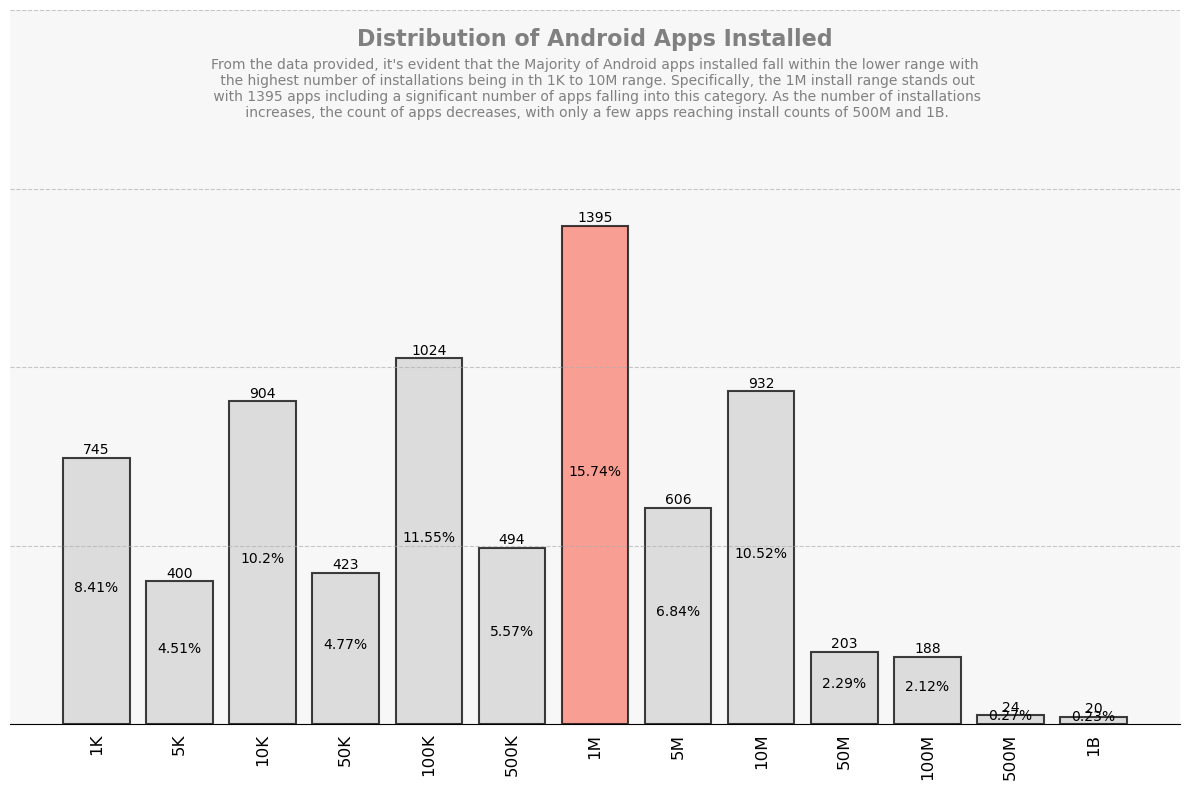

In [36]:
# styling the bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(categories, counts, color = "lightgrey", alpha = 0.75, edgecolor = "black", linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.yticks(range(0, 2500, 500), [])
plt.tick_params(bottom = 0, left = 0)

# highlighting the bar with highest count
max_count_cat = categories[counts.argmax()]
max_count_index = list(categories).index(max_count_cat)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

# adding data labels and percentages inside each bar
for bar, perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+2, height, ha="center", va="bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, (height/2)-10, f"{perc}%", ha="center", va="bottom", fontsize=10)
    
# adding chart title and conclusion in the chart
title = 'Distribution of Android Apps Installed'
conclusion = "From the data provided, it's evident that the Majority of Android apps installed fall within the lower range \
with\n the highest number of installations being in th 1K to 10M range. Specifically, the 1M install range stands out\n with 1395 \
apps including a significant number of apps falling into this category. As the number of installations\n increases, the count \
of apps decreases, with only a few apps reaching install counts of 500M and 1B."
plt.text(0.5, 0.95, title, horizontalalignment = "center", fontsize=16, transform=plt.gca().transAxes, 
         color = "grey", fontweight="bold")
plt.text(0.5, 0.85, conclusion, horizontalalignment = "center", fontsize=10, transform=plt.gca().transAxes, color = "grey")

# removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()
plt.gca().set_facecolor("#f7f7f7")

plt.show()

In [37]:
categories_android = android_free['Category'].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [38]:
pd.pivot_table(android_free, values = "Installs_int", index = "Category", aggfunc = "mean")

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [39]:
# Display DataFrame without scientific notation
pd.options.display.float_format = "{:.0f}".format

In [40]:
categories_installs = pd.pivot_table(android_free, values = "Installs_int", index = "Category", aggfunc = "mean")
categories_installs = categories_installs.sort_values(by="Installs_int", ascending = False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [41]:
# change Units to Alphanumeric with 1 decimal place

def alphanumeric_1unit(data):
    if data >= 1e9:
        return f'{data / 1e9 :.1f}B'
    elif data >= 1e6:
        return f'{data / 1e6 :.1f}M'
    elif data >= 1e3:
        return f'{data / 1e3 :.1f}K'
    else:
        return f'{data:.1f}'

In [42]:
categories_installs_units = categories_installs.map(alphanumeric_1unit)
categories_installs_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

In [43]:
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

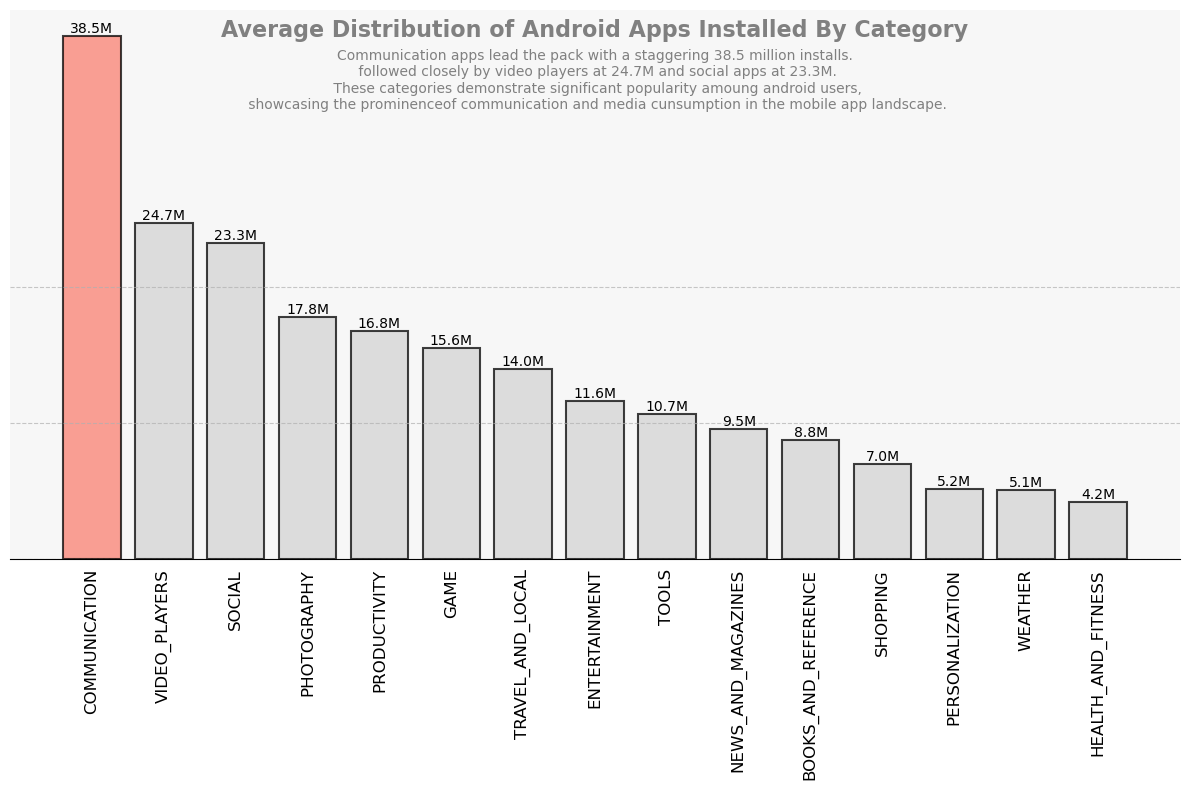

In [44]:
# styling the bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(categories, counts, color = "lightgrey", alpha = 0.75, edgecolor = "black", linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.yticks(range(0, 30000000, 10000000), [])
plt.tick_params(bottom = 0, left = 0)

# highlighting the bar with highest count
max_count_cat = categories[counts.argmax()]
max_count_index = list(categories).index(max_count_cat)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

# adding data labels and percentages inside each bar
for bar, data in zip(bars,categories_installs_units.values[:15]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1, data, ha="center", va="bottom", fontsize=10)
        
# adding chart title and conclusion in the chart
title = "Average Distribution of Android Apps Installed By Category"
conclusion = "Communication apps lead the pack with a staggering 38.5 million installs.\n followed closely by video \
players at 24.7M and social apps at 23.3M.\n These categories demonstrate significant popularity amoung android \
users,\n showcasing the prominenceof communication and media cunsumption in the mobile app landscape."
plt.text(0.5, 0.95, title, horizontalalignment = "center", fontsize=16, transform=plt.gca().transAxes, 
         color = "grey", fontweight="bold")
plt.text(0.5, 0.82, conclusion, horizontalalignment = "center", fontsize=10, transform=plt.gca().transAxes, color = "grey")

# removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()
plt.gca().set_facecolor("#f7f7f7")

plt.show()

In [45]:
categories_group = android_free.groupby("Category")

In [46]:
COMMUNICATION = categories_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending = False)
COMMUNICATION.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [47]:
VIDEO_PLAYERS = categories_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
VIDEO_PLAYERS.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
3665,YouTube,VIDEO_PLAYERS,4,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,1000000000
3687,Google Play Movies & TV,VIDEO_PLAYERS,4,906384,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,1000000000
3711,MX Player,VIDEO_PLAYERS,4,6474672,Varies with device,"500,000,000+",Free,0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,500000000
3675,VLC for Android,VIDEO_PLAYERS,4,1032076,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"July 30, 2018",Varies with device,2.3 and up,100000000
4688,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,5,9879473,40M,"100,000,000+",Free,0,Teen,Video Players & Editors,"August 4, 2018",7.2.1,4.1 and up,100000000


In [48]:
SOCIAL = categories_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
SOCIAL.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
2544,Facebook,SOCIAL,4,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
2554,Google+,SOCIAL,4,4831125,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,1000000000
2604,Instagram,SOCIAL,4,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
2610,Snapchat,SOCIAL,4,17015352,Varies with device,"500,000,000+",Free,0,Teen,Social,"July 30, 2018",Varies with device,Varies with device,500000000
2546,Facebook Lite,SOCIAL,4,8606259,Varies with device,"500,000,000+",Free,0,Teen,Social,"August 1, 2018",Varies with device,Varies with device,500000000


In [49]:
PHOTOGRAPHY = categories_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
PHOTOGRAPHY.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
2884,Google Photos,PHOTOGRAPHY,4,10859051,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1000000000
4574,"S Photo Editor - Collage Maker , Photo Collage",PHOTOGRAPHY,4,972574,45M,"100,000,000+",Free,0,Everyone,Photography,"August 3, 2018",2.31,4.1 and up,100000000
2949,Camera360: Selfie Photo Editor with Funny Sticker,PHOTOGRAPHY,4,4865132,51M,"100,000,000+",Free,0,Everyone,Photography,"August 6, 2018",9.3.1,4.0.3 and up,100000000
2908,Retrica,PHOTOGRAPHY,4,6120977,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"June 28, 2018",6.1.0,Varies with device,100000000
8307,LINE Camera - Photo editor,PHOTOGRAPHY,4,1517395,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"March 6, 2018",Varies with device,Varies with device,100000000


In [50]:
df = categories_group.get_group('PHOTOGRAPHY').sort_values(by="Installs_int", ascending=False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_units"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_units
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


## Conclusion
The analysis of the photography category indicates a noticeable surge in the popularity of photo editing and collage-making applications, with several apps garnering over 100 million installations. This suggests a strong user demand for photo-related functionalities.

Given this observation, there appears to be significant potential for a photo generation application in 2024. Such an app, offering prompt and free generation of pictures and photos, could capitalize on the existing user interest in photography apps. By providing innovative features, easy usability, and high-quality output, this application could stand out in the competitive market and attract a large user base.

Considering the success of existing photography apps and the evolving preferences of users, investing in the development of a photo generation app seems promising for tapping into this lucrative market segment in 2024.